In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Xiaomi India Case.xlsx')

In [3]:
df.drop('Customer', axis =1, inplace=True)

In [4]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,Wednesday,Chrome,29,4,11.3,6627.0
1,Wednesday,Chrome,29,4,11.3,6627.0
2,Wednesday,Chrome,8,5,5.0,3648.0
3,Wednesday,Firefox,32,3,12.7,7094.0
4,Wednesday,Chrome,18,2,11.0,4054.0


In [5]:
le = LabelEncoder()

In [6]:
for col in df.columns:
    if (df[col].dtype == object):
        df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,0,0,29,4,11.3,6627.0
1,0,0,29,4,11.3,6627.0
2,0,0,8,5,5.0,3648.0
3,0,1,32,3,12.7,7094.0
4,0,0,18,2,11.0,4054.0


In [8]:
#!pip install tensorflow

In [9]:
x = df.drop('Amount Spent (Rs.)', axis=1)

In [10]:
 y =df[['Amount Spent (Rs.)']]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=50)

#Building the ANN architecture

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model = Sequential([Dense(10, activation = 'tanh', input_shape =(5,)), 
                    Dense(15, activation = 'relu'),
                    Dense(1, activation = 'tanh')])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                60        
                                                                 
 dense_1 (Dense)             (None, 15)                165       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer = 'Adam', loss='mean_squared_error', metrics=['mae'])

In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/10
83/83 [==============================] - 1s 7ms/step - loss: 37575220.0000 - mae: 5709.8271 - val_loss: 36933628.0000 - val_mae: 5642.1914
Epoch 2/10
83/83 [==============================] - 0s 3ms/step - loss: 37571924.0000 - mae: 5709.5103 - val_loss: 36932900.0000 - val_mae: 5642.1138
Epoch 3/10
83/83 [==============================] - 0s 3ms/step - loss: 37571608.0000 - mae: 5709.4790 - val_loss: 36932856.0000 - val_mae: 5642.1104
Epoch 4/10
83/83 [==============================] - 0s 3ms/step - loss: 37571588.0000 - mae: 5709.4780 - val_loss: 36932852.0000 - val_mae: 5642.1099
Epoch 5/10
83/83 [==============================] - 0s 3ms/step - loss: 37571588.0000 - mae: 5709.4756 - val_loss: 36932852.0000 - val_mae: 5642.1099
Epoch 6/10
83/83 [==============================] - 0s 3ms/step - loss: 37571580.0000 - mae: 5709.4756 - val_loss: 36932852.0000 - val_mae: 5642.1099
Epoch 7/10
83/83 [==============================] - 0s 3ms/step - loss: 37571584.0000 - mae: 5709.47

In [17]:
import matplotlib.pyplot as plt

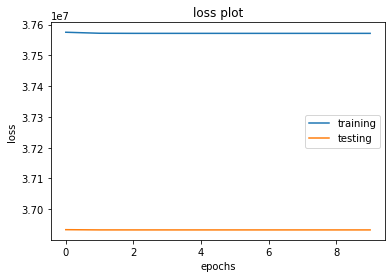

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss plot')
plt.legend(['training', 'testing'])

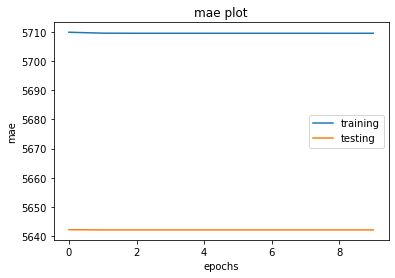

In [19]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('mae')
plt.title('mae plot')
plt.legend(['training', 'testing'])